## Kunskapskontroll DeepLearning - Frida Kilby

In [15]:
''' Original code from https://github.com/akmadan/Emotion_Detection_CNN.git '''
'''  and information from https://towardsdatascience.com/face-detection-for-beginners-e58e8f21aad9 '''
''' multilabel classification https://www.youtube.com/watch?v=Vh26kOCra-Y '''

''' I (Frida) have gone trough code, made changes, tried them out and in most cases kept the code intact '''
''' Code has mostly been executed in Google Colabs '''

' Code has mostly been executed in Google Colabs '

## Import libraries

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import cv2

from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

## Loading dataset

In [ ]:
pic_size = 48
folder_path ="/content/images/"

In [12]:
# Showing pictures didn't work in Colabs since folder_path became train/happy/happy when unzipping folders, so I reloaded images locally

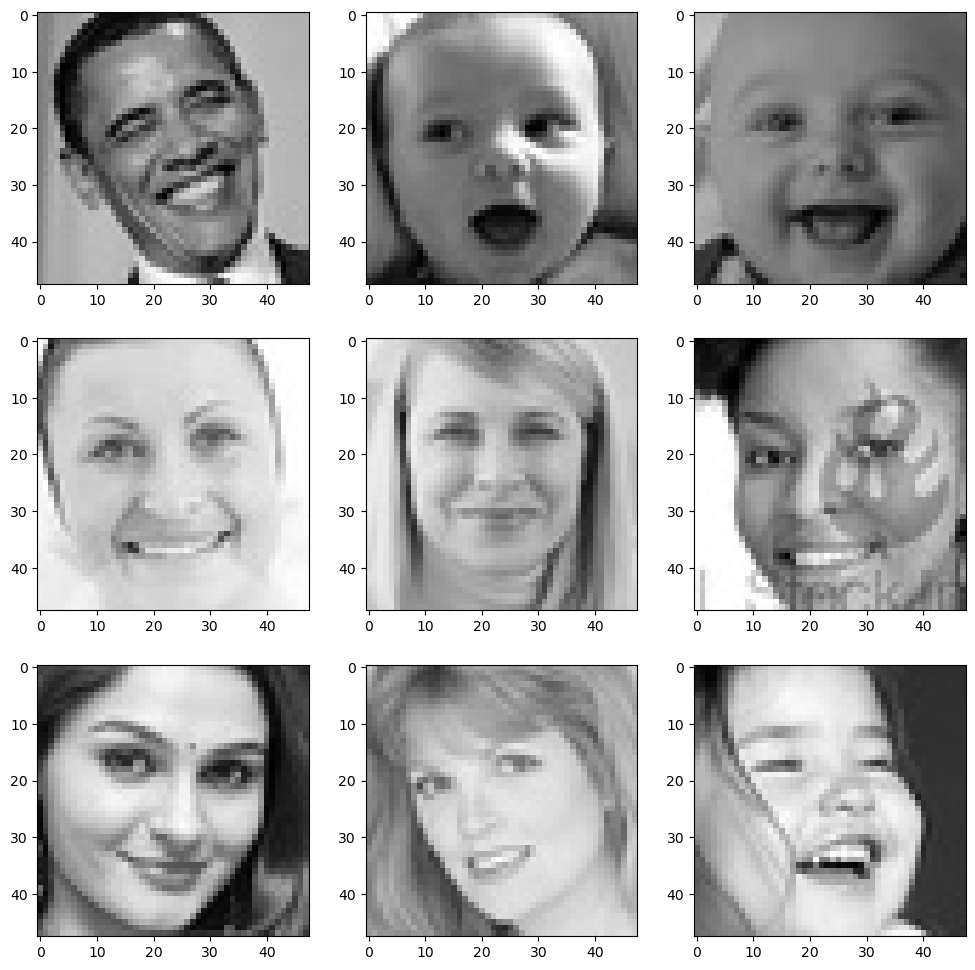

In [14]:
pic_size = 48
folder_path ="/content/images/"
folder_path_local = '../archive-emotions/images/'
emotion="happy"

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path_local+"train/"+emotion+"/"+
                  os.listdir(folder_path_local+"train/"+emotion+"/")[i], target_size=(pic_size, pic_size))
    plt.imshow(img)
plt.show()

## Unzipping folders containg train-set and validation-set in colabs

In [1]:
#!unzip '/content/temp/train/angry.zip' -d '/content/images/train/angry'
#!unzip '/content/temp/train/disgust.zip' -d '/content/images/train/disgust'
#!unzip '/content/temp/train/fear.zip' -d '/content/images/train/fear'
#!unzip '/content/temp/train/happy.zip' -d '/content/images/train/happy'
#!unzip '/content/temp/train/neutral.zip' -d '/content/images/train/neutral'
#!unzip '/content/temp/train/sad.zip' -d '/content/images/train/sad'
#!unzip '/content/temp/train/surprise.zip' -d '/content/images/train/surprise'

In [2]:
#!unzip '/content/temp/validate/angry.zip' -d '/content/images/validation/angry'
#!unzip '/content/temp/validate/disgust.zip' -d '/content/images/validation/disgust'
#!unzip '/content/temp/validate/fear.zip' -d '/content/images/validation/fear'
#!unzip '/content/temp/validate/happy.zip' -d '/content/images/validation/happy'
#!unzip '/content/temp/validate/neutral.zip' -d '/content/images/validation/neutral'
#!unzip '/content/temp/validate/sad.zip' -d '/content/images/validation/sad'
#!unzip '/content/temp/validate/surprise.zip' -d '/content/images/validation/surprise'

## Remove hidden folders

In [ ]:
# Code to remove unwanted hidden folders when needed, since using .zip folders this time no need for it 
# import shutil

In [ ]:
#shutil.rmtree('/content/images/train/.ipynb_checkpoints')
#shutil.rmtree('/content/images/validation/.ipynb_checkpoints')

## Create dataset

In [ ]:
# creating dataset for training and for validation/test. Had to add rescale=1.0/255.0 to code since there where no rescaling before

In [16]:
batch_size  = 128

datagen_train  = ImageDataGenerator(rescale=1.0/255.0)
datagen_val  = ImageDataGenerator(rescale=1.0/255.0)

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (pic_size,pic_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)

valid_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (pic_size,pic_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


## Create model

In [17]:
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3), padding = 'same', input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

In [ ]:
# Tried to make the process shorter by remoing reduce_learningrate, added it back again to get a better model.
# Had to change monitor in checkpoint to val_accuracy to make code work since the monitors have to be presented while fitting the model.

In [18]:
checkpoint = ModelCheckpoint("./my_10_emotional_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping, checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

## Fitting model

In [19]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = valid_set,
                                validation_steps = valid_set.n//valid_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/48
225/225 [==============================] - ETA: 0s - loss: 1.8415 - accuracy: 0.2857
Epoch 1: val_accuracy improved from -inf to 0.18935, saving model to ./my_10_emotional_model.h5
225/225 [==============================] - 22s 75ms/step - loss: 1.8415 - accuracy: 0.2857 - val_loss: 1.9132 - val_accuracy: 0.1893 - lr: 0.0010
Epoch 2/48
225/225 [==============================] - ETA: 0s - loss: 1.4797 - accuracy: 0.4301
Epoch 2: val_accuracy improved from 0.18935 to 0.37713, saving model to ./my_10_emotional_model.h5
225/225 [==============================] - 17s 77ms/step - loss: 1.4797 - accuracy: 0.4301 - val_loss: 1.7732 - val_accuracy: 0.3771 - lr: 0.0010
Epoch 3/48
225/225 [==============================] - ETA: 0s - loss: 1.3002 - accuracy: 0.5032
Epoch 3: val_accuracy improved from 0.37713 to 0.43679, saving model to ./my_10_emotional_model.h5
225/225 [==============================] - 17s 74ms/step - loss: 1.3002 - accuracy: 0.5032 - val_loss: 1.6127 - val_accuracy: 

## Accuracy

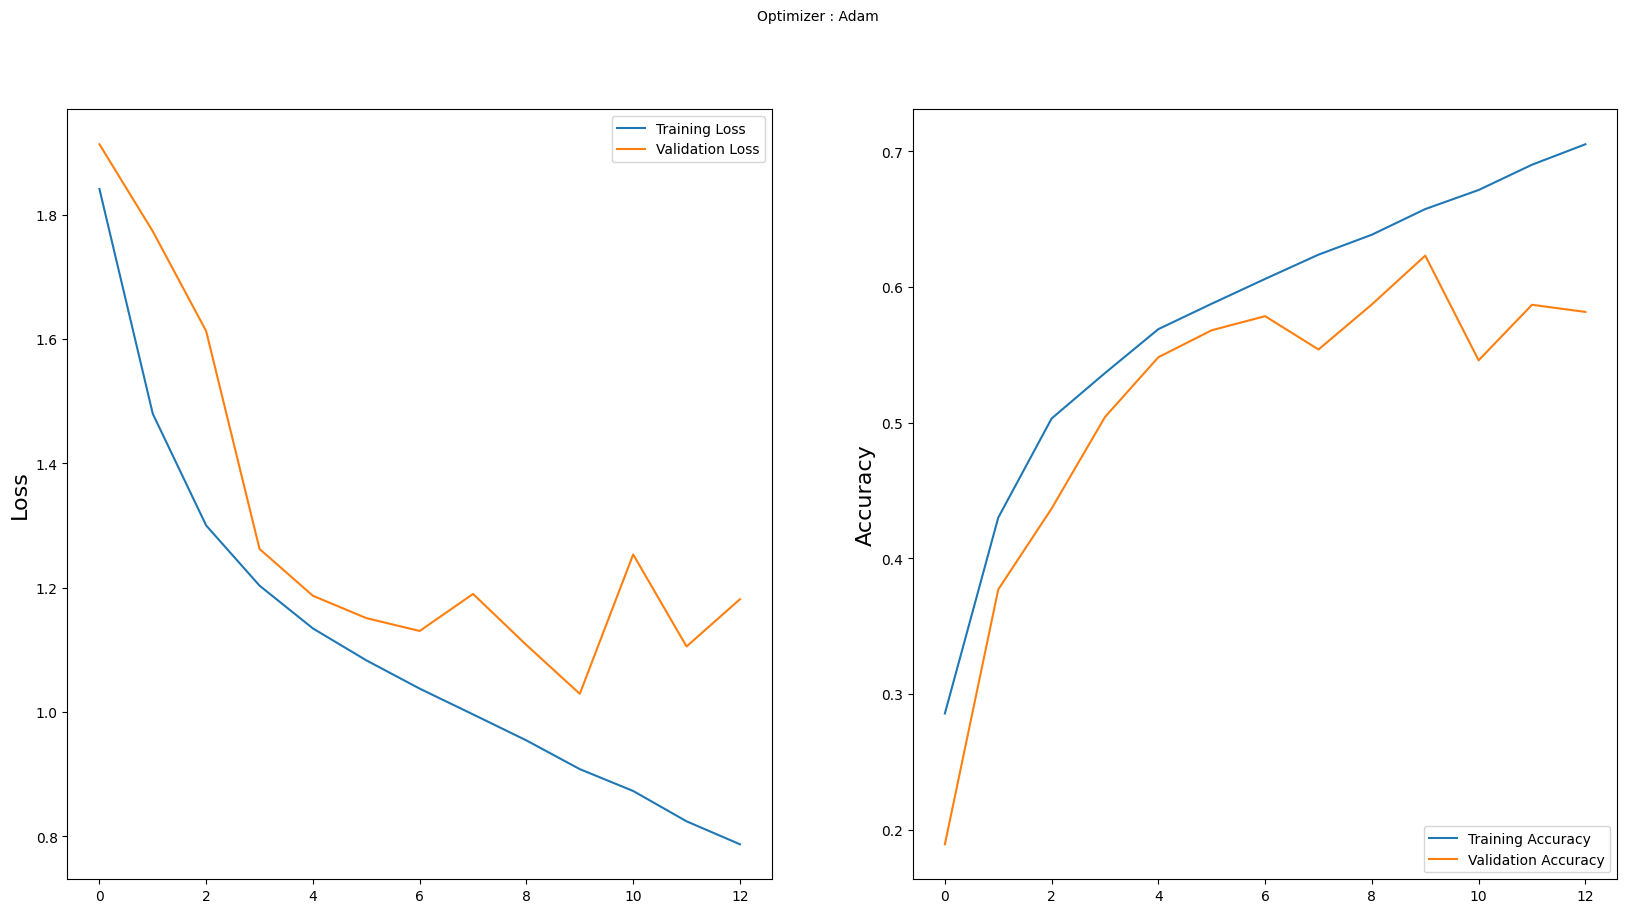

In [20]:
plt.style.use('default')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## Real-time video prediction

In [ ]:
# Checking if model works using videocapture didn't work with colabs so I executed next part locally, since the change in file-path

In [7]:
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

In [8]:
# Instancing the face_classifier which is a xlm-software haar-cascade frontal face (Haar-like algorithms) that can detect faces in an image
# it returns a square that is 24 times 24 and shows the posititon oin x and y for the face
# so if I want to detect eyes I need to work with another classifier (?)
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# loading my trained model
classifier =load_model('my_10_emotional_model.h5')


# the labels that we are detecting
emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']

# Instanciate the videocamera
cap = cv2.VideoCapture(0)

# until you hit the q-button to close
# reading from camera and processing copy of image to grayscale
# identifying faces in different sizes with detect multiscale
# for the faces print a rectangle around and name the resized image inside to roi_gray
# if roi_grey exsist preprocess image to an array of typoe float
# redict the image and label the square around the face with the prediction
# if no faces can be identified write No Faces
# show/print the sqaure and the label
while True:
    _, frame = cap.read()
    labels = []
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)

        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

            prediction = classifier.predict(roi)[0]
            label=emotion_labels[prediction.argmax()]
            label_position = (x,y)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        else:
            cv2.putText(frame,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    cv2.imshow('Emotion Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 39ms/step


## Egenutvärdering

1. Utmaningar du haft under arbetet samt hur du hanterat dem.
2. Vilket betyg du anser att du skall ha och varför. 
3. Tips du hade ”gett till dig själv” i början av kursen nu när du slutfört den. 

1.  Uppsättande av Enviorment i Jupyter, hade problem med Keras och Tensorflow tillsammans med versionen av Python av någon anledning.
    Många omgångar med installera och avinstallera bara för att inte att jag hade gjort att i fel enviorment.
    Nedladdning av dataset från Kaggle, tog en stund innan jag insåg att jag behövde skapa ett konto.
    Dataset jag valde att gå vidare med som var ett glasses or no glasses hade inte alls samma typer av bilder som dataset med emotions.
    Att komma på att det var problemet och göra om bilderna genom en preprocess tog en stund.
    Träna modell på stort dataset när Google Colabs inte vill leverera en T4 uppkoppling.
    Samt att ladda upp data till google colabs när det hänger sig och utöver det skapar dolda mappar som ger extra classer vid inläsning av data.

2.  G bör modell för ansiktsigenkänning ge.
    Även om 99 % av koden är samma som i videon så har jag gått igenom alla delar och ändrat vissa för att sedan ändra tillbaka igen.
    VG kanske modellen för glasögon eller inte glasögon kan ge, där återfinns även slutsats
   

3.  Den här kursen tyckte jag att jag var mer i rätt fas i, även om jag inte hunnit med att läsa så mycket i boken.
    Så har jag ändå hängt med i teorin i och med videos och datacamp och förstått mer och mer ju längre kursen gått.

## VG uppgift återfinns i python-filen MakingModel_glasses_